# City Power Load: Markov Chain with Time-Dependent Transition Matrices

---

## Scenario

A modern city wants to understand how its electricity demand naturally shifts between **Peak**, **Mid**, and **Off-Peak** periods throughout the day.  
In reality, the way power usage transitions from one state to another is not the same during the day and at night.  
For example, commercial activities and offices keep daytime demand high, while late-night demand naturally drops but may still have unexpected surges from industries or residential use.

To capture this behavior, the city’s energy team designs a **Markov Chain model** with **time-dependent transition matrices**:
- One transition matrix represents **Daytime** conditions.
- Another transition matrix represents **Nighttime** conditions.

By switching matrices at different periods, planners can simulate a more realistic scenario and evaluate how the long-term load distribution responds under this dynamic approach.

---

## Goal

- Simulate the evolution of power load states (**Peak**, **Mid**, **Off-Peak**) using separate transition matrices for day and night.
- Visualize how the probability of being in each load state changes over time.
- Analyze whether the current strategy naturally balances the grid or if further adjustments to transition probabilities are needed.

---

## Key Idea

- A Markov Chain models how the system’s state evolves step by step.  
  By using **time-dependent transition matrices**, you can reflect different energy usage patterns during the day and night, showing how local transition assumptions shape the city’s long-term energy “rhythm.”



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
states = ['Peak', 'Mid', 'Off-Peak']

T_daytime = np.array([
    [0.7, 0.2, 0.1],
    [0.4, 0.5, 0.1],
    [0.2, 0.5, 0.3]
])

T_night = np.array([
    [0.3, 0.5, 0.2],
    [0.2, 0.6, 0.2],
    [0.1, 0.3, 0.6]
])

print("Daytime sums:", T_daytime.sum(axis=1))
print("Nighttime sums:", T_night.sum(axis=1))

Daytime sums: [1. 1. 1.]
Nighttime sums: [1. 1. 1.]


In [7]:
P0 = np.array([1, 0, 0])

steps = 24
P_history = [P0]

for i in range(steps):
    if i % 24 < 12:  # First 12 steps = Daytime
        T = T_daytime
    else:            # Next 12 steps = Nighttime
        T = T_night
    P_next = P_history[-1] @ T
    P_history.append(P_next)

P_history = np.array(P_history)

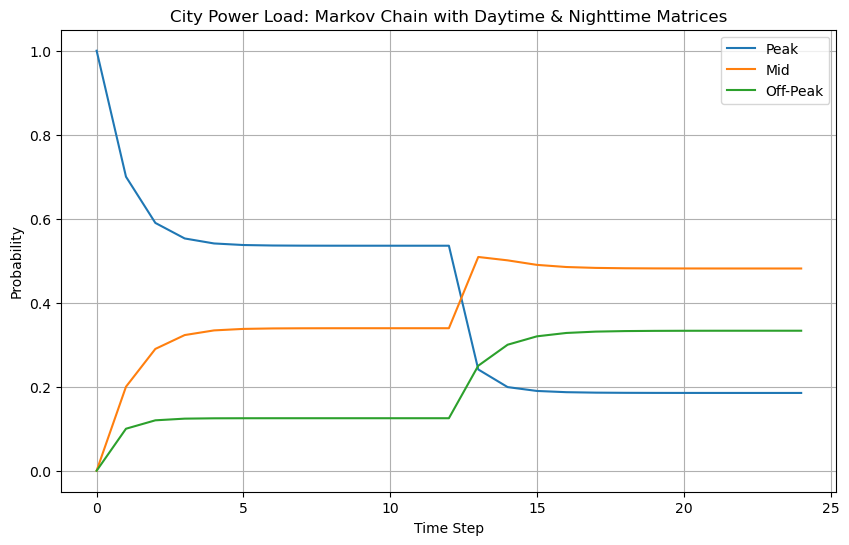

In [8]:
plt.figure(figsize=(10, 6))
for i, state in enumerate(states):
    plt.plot(range(steps+1), P_history[:, i], label=state)

plt.title('City Power Load: Markov Chain with Daytime & Nighttime Matrices')
plt.xlabel('Time Step')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation: How to Read the Markov Chain Load Evolution

---

### What does this line chart show?

- **Each line** represents the probability of the system being in each load state (**Peak**, **Mid**, **Off-Peak**) at each time step.
- The **horizontal axis** is the time step (e.g., hours, periods).
- The **vertical axis** is the probability (0 to 1) for each state.

---

### What to check?

1️. **Short-term behavior (transient)**  
   - Observe how the system shifts away from the initial state.
   - For example, starting with 100% Peak Load:  
     → Does the Peak probability drop quickly?  
     → Where does that probability flow (Mid? Off-Peak?)?

2️. **Effect of different time segments**  
   - Check what happens when the transition matrix changes  
     (Daytime → Nighttime).  
   - Do you see a clear jump or shift in trends?  
     → This shows how local rules can reshape the system instantly.

3️. **Long-term steady state**  
   - Do the lines level off (stabilize) after some steps?  
   - If they stabilize, the system is reaching a **steady-state distribution** under the combined effect of both matrices.

---

### What is the “power” of Markov Chains here?

In this example, the **Markov Chain** shows its strength in three ways:

- It takes **simple local transition rules** (the matrices) and turns them into a **global trend** — you can see how small step-by-step transitions produce a realistic long-term pattern.
- It allows you to test different strategies:  
  → By tweaking the transition probabilities, you see how easily the load distribution can shift.  
  → For example, if the Peak Load remains high, planners can simulate demand response or storage to modify the matrix.
- It visualizes **how dynamic your system is** — instead of only getting a final number, you see how your system breathes and adjusts over time.

---

###  Takeaway

> **A Markov Chain is a bridge between local transition assumptions and long-term system behavior.**  
> In city energy planning, this means you can model, visualize, and optimize your supply-demand balance with simple, understandable rules — and adjust them to shape a more sustainable “power rhythm” for the city.
